In [5]:
import json

from data_cleaning import clean_annotations_file

annotations_dictionary = clean_annotations_file()

annotations_path = 'Datasets/face-h 2.v2i.coco/processed_annotations.json'

with open('Datasets/face-h 2.v2i.coco/processed_annotations.json', 'w+') as f:
    json.dump(annotations_dictionary, f)

In [6]:
import data_utils

image_path = 'Datasets/face-h 2.v2i.coco/train/'

hair_dataset = data_utils.HairDataset(image_path, annotations_path)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [7]:
image, target = hair_dataset[4]

target

/home/ibster/Desktop/NetFM/data_utils.py:60: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  target['masks'] = torch.tensor(target['masks'])


{'area': tensor([237984.]),
 'image_id': tensor(6),
 'labels': tensor([3]),
 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
 'boxes': tensor([[232,  20, 768, 464]])}

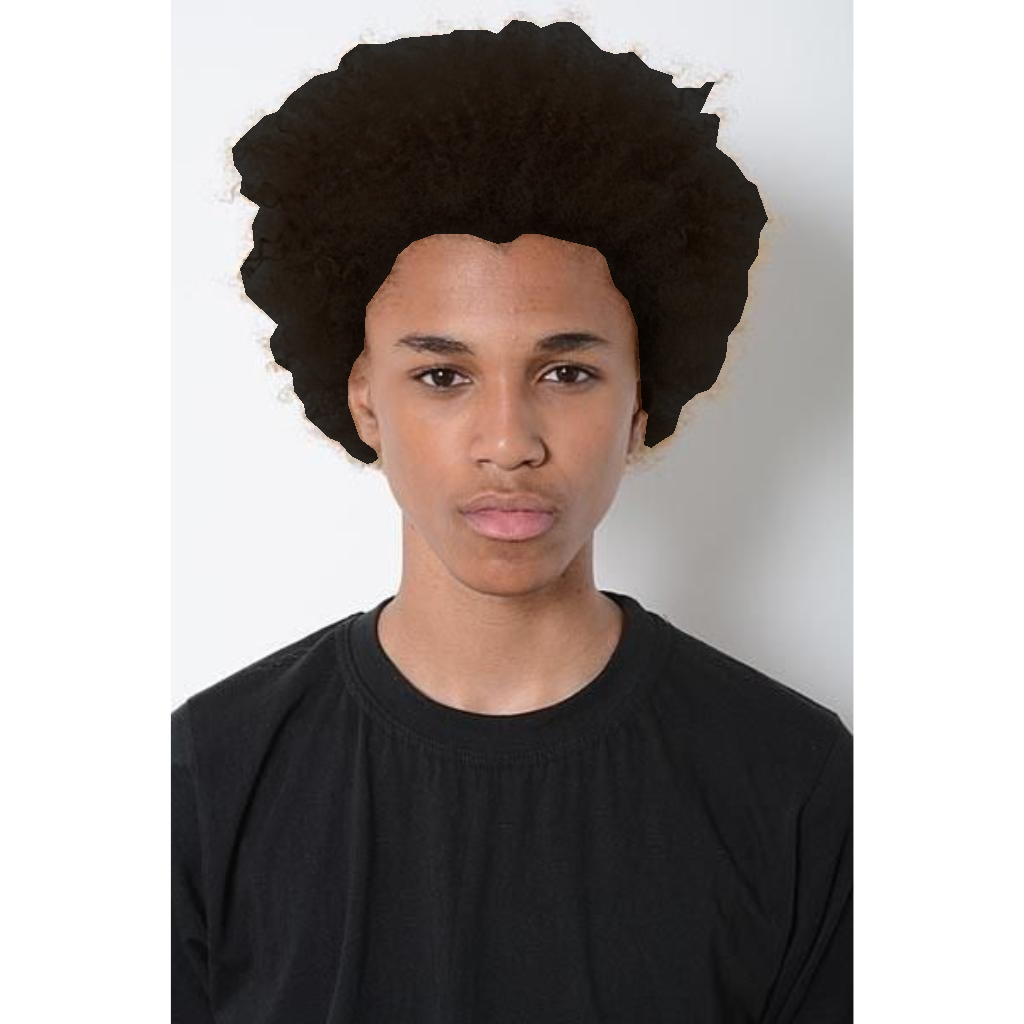

In [8]:
from visual_utils import draw_masks_on_image

draw_masks_on_image(image, target['masks'])

In [9]:
from torchvision import models

model = models.get_model("maskrcnn_resnet50_fpn_v2", weights="MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT")

In [10]:
from torch.utils.data import DataLoader

hair_dataloader = DataLoader(
    hair_dataset,
    batch_size = 6,
    collate_fn=lambda batch: tuple(zip(*batch))
)

images, targets = next(iter(hair_dataloader))

In [11]:
model.eval()

predictions = model(images)

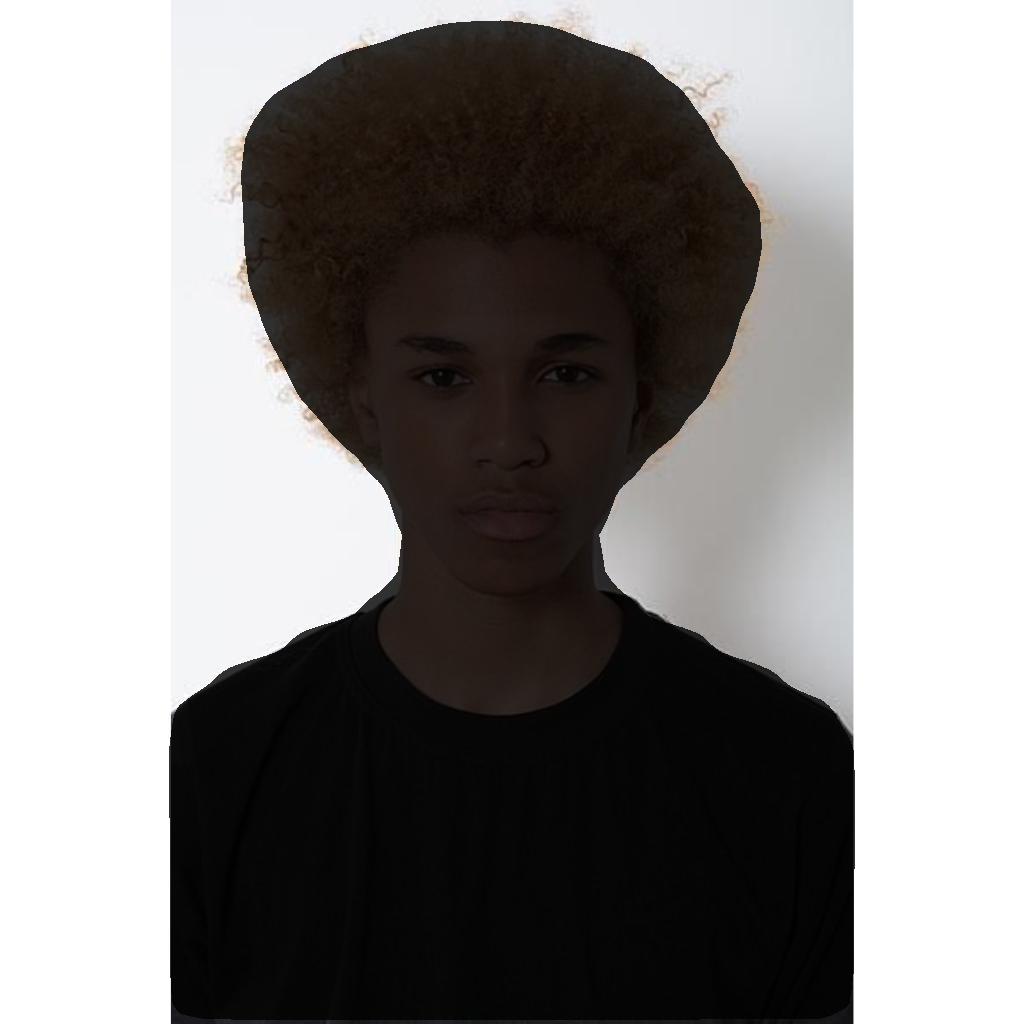

In [12]:
draw_masks_on_image(images[4], predictions[4]['masks'])

In [15]:
import torch

from training_loop import train

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)

train(model, hair_dataloader, epochs=1)

Epoch: 0, batch index: 0, learning rate: [0.01], loss:1.458417534828186
Epoch: 0, batch index: 1, learning rate: [0.01], loss:1.0833988189697266
Epoch: 0, batch index: 2, learning rate: [0.01], loss:0.9508009552955627
Epoch: 0, batch index: 3, learning rate: [0.01], loss:0.8282834887504578
Epoch: 0, batch index: 4, learning rate: [0.01], loss:1.1005730628967285
Epoch: 0, batch index: 5, learning rate: [0.01], loss:0.8304942846298218
Epoch: 0, batch index: 6, learning rate: [0.01], loss:0.9856504201889038
Epoch: 0, batch index: 7, learning rate: [0.01], loss:0.9906038045883179
Epoch: 0, batch index: 8, learning rate: [0.01], loss:0.682799756526947
Epoch: 0, batch index: 9, learning rate: [0.01], loss:0.8425632119178772
Epoch: 0, batch index: 10, learning rate: [0.01], loss:0.7231383919715881
Epoch: 0, batch index: 11, learning rate: [0.01], loss:0.7554606199264526
Epoch: 0, batch index: 12, learning rate: [0.01], loss:0.5570622086524963
Epoch: 0, batch index: 13, learning rate: [0.01], 

In [17]:
state_dict = torch.load('My Model.pt')

model.load_state_dict(state_dict)

/tmp/ipykernel_32315/1144344415.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('My Model.pt')


<All keys matched successfully>

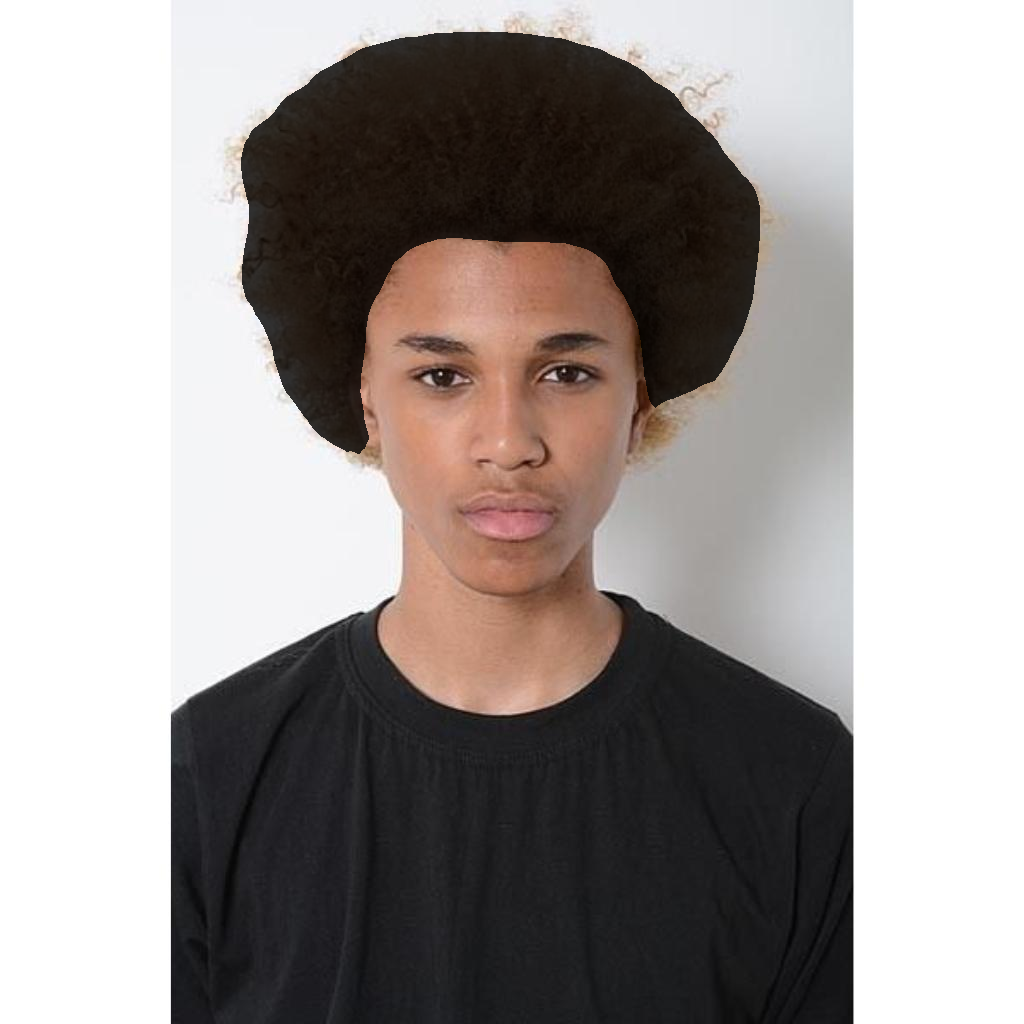

In [19]:
model.to('cpu')

model.eval()

predictions = model(images)

draw_masks_on_image(images[4], predictions[4]['masks'])